In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

The data was taken from https://www.kaggle.com/goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics

In [2]:
population = pd.read_csv(r'C:\Users\owner\population\real_estate_db.csv', encoding='ISO-8859-1')
population.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [3]:
population.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,...,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
1,220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,...,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
2,220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,...,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838
3,220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,...,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563
4,220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,...,34.96611,31.75000,20.49887,655.98066,2905.0,0.56936,0.51034,0.08315,0.06731,0.08711


In [4]:
#population.groupby('state').describe()

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

In [5]:
population.shape

(39030, 80)

In [6]:
#population.dtypes

# Outcome Variable

 - Outcome variable: hc_mortgage_mean(the mean monthly mortgage and owner costs of specified geographic location) for Texas

In [7]:
population_tx = population[population.state == 'Texas']

In [8]:
#population_tx[population.hc_mortgage_mean.isnull() == True].count()

In [9]:
#Filling the missing values with the mortage mean
mean = population_tx['hc_mortgage_mean'].mean()
population_tx['hc_mortgage_mean'].fillna(mean, inplace=True)

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
#check that there are no NANs left
#population[population.hc_mortgage_mean.isnull() == True].count()

In [11]:
population_tx['hc_mortgage_mean'].dtype

dtype('float64')

In [12]:
population_tx['hc_mortgage_mean'].dtype

dtype('float64')

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


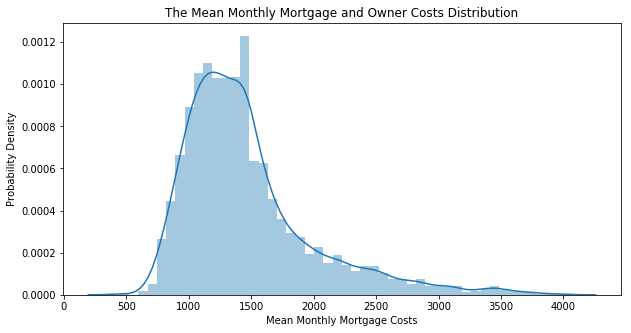

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(population_tx.hc_mortgage_mean)
plt.title('The Mean Monthly Mortgage and Owner Costs Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Mean Monthly Mortgage Costs')
plt.show()

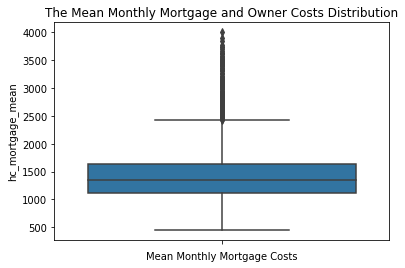

In [14]:
sns.boxplot(population_tx.hc_mortgage_mean, orient='v')
plt.title('The Mean Monthly Mortgage and Owner Costs Distribution')
plt.xlabel('Mean Monthly Mortgage Costs')
plt.show()

# Categorical Variables

zipcode

# Continuous Variables 

Selected the following features: 

'family_mean', 'debt', 'pop', 'hs_degree','zip_code','rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50'

In [15]:
correlation = population_tx.loc[:,['hc_mortgage_mean','family_mean','debt','pop','hs_degree','rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'home_equity']].corr()
sliced_tx = population_tx.loc[:,['hc_mortgage_mean','family_mean','debt','pop', 'home_equity','hs_degree','rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50']]

In [16]:
print(correlation)

                  hc_mortgage_mean  family_mean      debt       pop  \
hc_mortgage_mean          1.000000     0.855835  0.432057  0.124300   
family_mean               0.855835     1.000000  0.491638  0.139514   
debt                      0.432057     0.491638  1.000000  0.344221   
pop                       0.124300     0.139514  0.344221  1.000000   
hs_degree                 0.581626     0.716723  0.514992  0.094652   
rent_gt_10               -0.058024    -0.154708  0.082907  0.043642   
rent_gt_15               -0.095115    -0.221420  0.087684  0.053955   
rent_gt_20               -0.173982    -0.318881 -0.011041 -0.001599   
rent_gt_25               -0.235374    -0.389872 -0.094225 -0.018584   
rent_gt_30               -0.236326    -0.390477 -0.151817 -0.021974   
rent_gt_35               -0.225936    -0.365191 -0.166478 -0.025929   
rent_gt_40               -0.214947    -0.343405 -0.166751 -0.040910   
rent_gt_50               -0.170329    -0.288489 -0.157914 -0.050954   
home_e

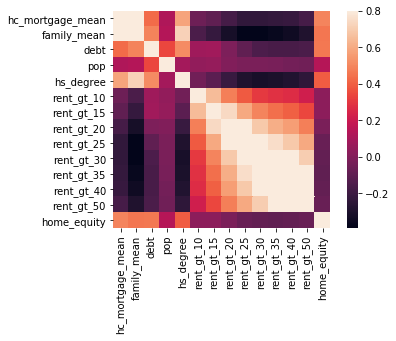

In [17]:
sns.heatmap(correlation, vmax=.8, square=True)
plt.show()

Combined the features: different rent subgroups into two major groups 10 to 25 and 30 to 50.

In [18]:
features = sliced_tx
features.head()
features.drop(columns=['rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25','rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50'])

,hc_mortgage_mean,family_mean,debt,pop,home_equity,hs_degree
32953,1469.299347,116607.34320,0.00000,6802,0.00000,0.66947
32954,1073.630550,49849.35453,0.52713,4587,0.00886,0.76135
32955,1091.581740,59783.86809,0.44495,5751,0.00712,0.80910
32956,1282.834330,72543.84962,0.36391,7079,0.01733,0.82599
32957,1826.764080,121879.56420,0.61183,2160,0.02957,0.82065
32958,1281.162850,101189.25630,0.50411,7008,0.00547,0.75644
32959,1108.930150,84222.49255,0.31358,2985,0.00494,0.68746
32960,1126.875960,63045.57203,0.39940,6093,0.01493,0.85002
32961,994.333040,57007.52607,0.43276,6588,0.02471,0.79224
32962,1214.615270,71583.06673,0.40762,4967,0.01466,0.86891


In [19]:
means = sliced_tx[['rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25']].mean(axis=0)
stds = sliced_tx[['rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25']].std(axis=0)

features['rent_10_to_25'] = ((sliced_tx[['rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25']] - means) / stds).mean(axis=1)

means_one = sliced_tx[['rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50']].mean(axis=0)
stds_one = sliced_tx[['rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50']].std(axis=0)
features['rent_30_to_50'] = ((sliced_tx[['rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50']] - means_one) / stds_one).mean(axis=1)

plotdf = sliced_tx.loc[:,['rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25']]
plotdf['rent_10_to_25'] = features['rent_10_to_25'] 
corrmat = plotdf.corr()
print(corrmat)

plotdf_one = sliced_tx.loc[:,['rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50']]
plotdf_one['rent_30_to_50'] = features['rent_30_to_50'] 
corrmat_one = plotdf_one.corr()
print(corrmat_one)

               rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_10_to_25
rent_gt_10       1.000000    0.654795    0.479909    0.390294       0.749072
rent_gt_15       0.654795    1.000000    0.742039    0.599792       0.888986
rent_gt_20       0.479909    0.742039    1.000000    0.814438       0.900781
rent_gt_25       0.390294    0.599792    0.814438    1.000000       0.831997
rent_10_to_25    0.749072    0.888986    0.900781    0.831997       1.000000
               rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  rent_30_to_50
rent_gt_30       1.000000    0.894813    0.815869    0.704153       0.912879
rent_gt_35       0.894813    1.000000    0.914827    0.795719       0.963811
rent_gt_40       0.815869    0.914827    1.000000    0.871156       0.962874
rent_gt_50       0.704153    0.795719    0.871156    1.000000       0.901168
rent_30_to_50    0.912879    0.963811    0.962874    0.901168       1.000000


In [20]:
features = features.drop(columns=['rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25','rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50'])

In [21]:
features.head()

,hc_mortgage_mean,family_mean,debt,pop,home_equity,hs_degree,rent_10_to_25,rent_30_to_50
32953,1469.299347,116607.34320,0.00000,6802,0.00000,0.66947,-4.480006,-1.691702
32954,1073.630550,49849.35453,0.52713,4587,0.00886,0.76135,0.457581,0.714714
32955,1091.581740,59783.86809,0.44495,5751,0.00712,0.80910,-1.186640,-0.217849
32956,1282.834330,72543.84962,0.36391,7079,0.01733,0.82599,-0.139894,-0.835085
32957,1826.764080,121879.56420,0.61183,2160,0.02957,0.82065,-1.143758,-1.546330


In [22]:
newmatt = features.corr()
print(newmatt)

                  hc_mortgage_mean  family_mean      debt       pop  \
hc_mortgage_mean          1.000000     0.855835  0.432057  0.124300   
family_mean               0.855835     1.000000  0.491638  0.139514   
debt                      0.432057     0.491638  1.000000  0.344221   
pop                       0.124300     0.139514  0.344221  1.000000   
home_equity               0.493111     0.456609  0.462185  0.143828   
hs_degree                 0.581626     0.716723  0.514992  0.094652   
rent_10_to_25            -0.166871    -0.321816  0.019640  0.022966   
rent_30_to_50            -0.226570    -0.370984 -0.171544 -0.037364   

                  home_equity  hs_degree  rent_10_to_25  rent_30_to_50  
hc_mortgage_mean     0.493111   0.581626      -0.166871      -0.226570  
family_mean          0.456609   0.716723      -0.321816      -0.370984  
debt                 0.462185   0.514992       0.019640      -0.171544  
pop                  0.143828   0.094652       0.022966      -0.0373

In [23]:
features[features.isnull() == True].count()

hc_mortgage_mean    0
family_mean         0
debt                0
pop                 0
home_equity         0
hs_degree           0
rent_10_to_25       0
rent_30_to_50       0
dtype: int64

In [24]:
#Scaling the variables
features_pca = features.dropna()
X = StandardScaler().fit_transform(features_pca)

In [31]:
sklearn_pca = PCA(n_components=0.95)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
print('Total variance explained:', np.sum(sklearn_pca.explained_variance_ratio_))

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.43405296 0.1948269  0.12565105 0.07803545 0.07033511 0.044195
 0.04025017]
Total variance explained: 0.9873466509407164


In [33]:
pd.DataFrame(Y_sklearn)

,0,1,2,3,4,5,6
0,0.417382,-5.552506,1.081822,-0.272023,2.932033,0.605567,1.393545
1,-1.463915,0.476969,-0.003534,-0.256343,-0.448138,0.100677,0.216393
2,-0.643553,-1.408173,0.676352,-0.162923,0.034182,0.565621,0.667913
3,-0.315619,-0.887439,0.724355,-0.384150,0.329532,0.596878,-0.805820
4,1.644298,-2.030036,-0.588223,0.014291,-0.210356,-0.876282,-0.063567
5,0.412503,-1.934107,1.108461,-0.390140,0.498322,-0.085589,0.792612
6,-1.448923,-0.472806,-0.683947,-0.401449,0.213361,-0.200041,-0.856276
7,-0.235304,-1.991104,0.810952,-0.032914,0.209104,0.880899,0.599184
8,-0.592804,-1.353874,1.000269,0.269509,0.127677,0.684184,0.279257
9,-0.253368,-1.351317,0.178733,-0.276552,0.017971,0.742459,0.234057
